In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib notebook

import timeseriesclient as tsc

In [19]:
tsc.globalsettings.environment.set_test()  # Work with test environment

# Create series data

The timeseriesclient work with Pandas Dataframe and Series object. Let's create a dummy series. 

In [20]:
index = pd.date_range('2016-01-03', freq='min', periods=100)
df_dummy = pd.DataFrame({'temp': 20. + np.random.randn(100)}, index=index)

In [21]:
df_dummy.head()

,temp
2016-01-03 00:00:00,20.221091
2016-01-03 00:01:00,21.611999
2016-01-03 00:02:00,20.470304
2016-01-03 00:03:00,20.395752
2016-01-03 00:04:00,20.371470


# Upload to the reservoir

First, authenticate yourself towards the reservoir.

In [23]:
auth_key = tsc.Authenticator('ace@4subsea.com')

Password: ········


Then initiate a client and use the authentication key.

In [24]:
client = tsc.TimeSeriesClient(auth_key)

Upload the DataFrame and store the response from the reservoir.

In [25]:
response = client.create(df_dummy)

In [26]:
response

{u'FileId': u'e44de8d2-f6c0-48c7-9f12-62850b4c9a1a',
 u'TimeOfFirstSample': 1451779200000000000L,
 u'TimeOfLastSample': 1451785140000000000L,
 u'TimeSeriesId': u'e9384a99-825f-4ba1-9c97-4cb6dfa31574'}

The reservoir assigns a unique id - TimeSeriesId. This id can be used to make requests towards the reservoir.

# Series information

Lets ask the reservoir about the newly created series data.

In [27]:
info = client.info(response['TimeSeriesId'])

In [28]:
info

{u'Created': u'2017-01-16T19:06:28.7801827+00:00',
 u'CreatedByEmail': u'ace@4subsea.com',
 u'LastModified': u'2017-01-16T19:06:28.7801827+00:00',
 u'LastModifiedByEmail': u'ace@4subsea.com',
 u'Metadata': {},
 u'TimeOfFirstSample': 1451779200000000000L,
 u'TimeOfLastSample': 1451785140000000000L,
 u'TimeSeriesId': u'e9384a99-825f-4ba1-9c97-4cb6dfa31574'}

Note that the TimeOfFirstSample and TimeOfLastSample is stored as nanoseconds since POSIX epoch.

# Append more data

In [29]:
index = pd.date_range('2016-01-05', freq='min', periods=100)
df_dummy_append = pd.DataFrame({'temp': 23. + np.random.randn(100)}, index=index)

In [30]:
client.append(df_dummy_append, response['TimeSeriesId'])

{u'FileId': u'3019c3ed-bc7d-4058-b3d1-4dde24bbc579',
 u'TimeOfFirstSample': 1451952000000000000L,
 u'TimeOfLastSample': 1451957940000000000L,
 u'TimeSeriesId': u'e9384a99-825f-4ba1-9c97-4cb6dfa31574'}

# Retrieve data back from the reservoir

In [31]:
data = client.get(response['TimeSeriesId'])

In [32]:
data.head()

time
1451779200000000000    20.221091
1451779260000000000    21.611999
1451779320000000000    20.470304
1451779380000000000    20.395752
1451779440000000000    20.371470
Name: values, dtype: float64

In [33]:
data_datetime = client.get(response['TimeSeriesId'], convert_date=True)

In [37]:
data_datetime.head()

time
2016-01-03 00:00:00    20.221091
2016-01-03 00:01:00    21.611999
2016-01-03 00:02:00    20.470304
2016-01-03 00:03:00    20.395752
2016-01-03 00:04:00    20.371470
Name: values, dtype: float64

<IPython.core.display.Javascript object>


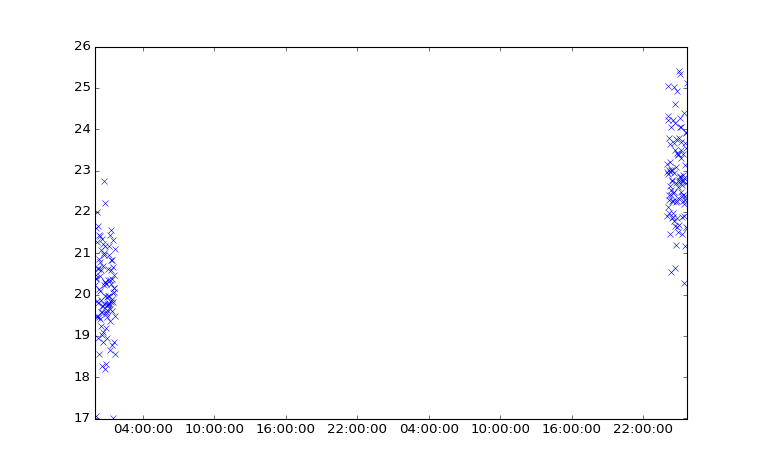

In [45]:
plt.figure()
plt.plot(data_datetime, 'x')

# Delete data in the reservoir

In [36]:
client.delete(response['TimeSeriesId'])